<h1 style="font-family:verdana;"><center>Model to Deployment 🚀</center></h1>

***

<h1 style="font-family:verdana;" id="Overview"> 
        Overview  
</h1>

<p style="font-size:15px; font-family:verdana;">In this notebook I will introduce one of the easiest way to take your deep learning model into production.Let's name this project <b>Recyclops</b> because I am a fan of <a href="https://www.google.com/search?q=the+office&oq=the+office&aqs=chrome.0.0i271j46i340i433i512l2j0i67i650j0i433i512j46i199i465i512j69i61j69i60.2434j0j7&sourceid=chrome&ie=UTF-8">The Office</a>. I will be using <a href="https://www.fast.ai/">Fast.ai</a> to build image classification model later will be deploying this model in production with <a href="https://fastapi.tiangolo.com/lo/">FastApi</a> and <a href="https://railway.app/">Railway</a>.<p>

<img src="https://media.tenor.com/BXKqjpuLrLkAAAAC/recycle-theoffice.gif" style="display: block; margin: 0 auto"/>

<div style="font-size:15px; font-family:verdana;">
<h3>End result will be something like this</h3>
 </div>

 <img src="https://imgur.com/hep8mZx.gif" alt="End-Result" style="width:288px;height:640px;display: block; margin: 0 auto">

<div style="font-size:15px; font-family:verdana;">
<h3>Structure that I will be following</h3>
 <ul>
        <li>Brief Introduction with code to you famliar with the frameworks</li>
        <li>Final Code File like model.py which you can dowload from output to simply run it on your own machine </li>
    </ul>
  </div>

<h1 style="font-family:verdana;" id="Model"> 
        Creating Image Classification Model
</h1>

<p style="font-size:15px; font-family:verdana;">The Fastai library is a deep learning library with lots of really cool functions, it can be used from the data acquisition stage through to data cleaning, model development, and evaluation.<p>

<p style="font-size:24px; font-family:verdana;">Imports</p>

In [16]:
# Libraries for Vision model
from fastai.vision.all import get_image_files,ImageDataLoaders,Resize,aug_transforms,vision_learner,error_rate, load_learner, PILImage
from fastai.vision.widgets import *
import pandas as pd
from fastai.vision.all import resnet18, resnet34, ClassificationInterpretation

import warnings
warnings.filterwarnings('ignore')

In [8]:
# Path to the data
path = "C:/Users/adipi/Documents/Code/Internship-RAKRIC-0723/Dataset"
files = get_image_files(path)

In [9]:
# Checking the size of image files
from fastcore.parallel import *
def f(o): return PILImage.create(o).size
sizes = parallel(f,files,n_workers=8)
pd.Series(sizes).value_counts()

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `max_workers` has to be changed to 0 to avoid getting stuck


(512, 384)    2527
Name: count, dtype: int64

<p style="font-size:15px; font-family:verdana;">Looking at the data, I plan to resize the image files to 224px Sqaure with Crop</p>

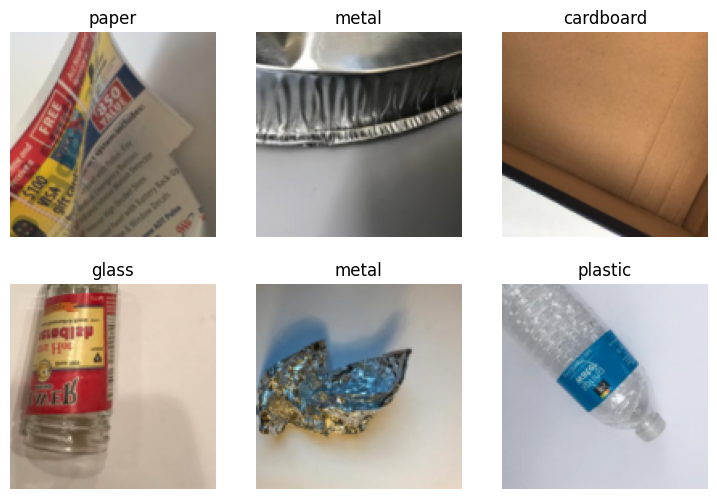

In [10]:
# Creating Dataloaders
dls = ImageDataLoaders.from_folder(path,valid_pct=0.2,
                                   item_tfms = Resize(224),
                                   batch_tfms = aug_transforms(size=128,min_scale=0.75))
dls.show_batch(max_n=6)

In [15]:
# Initial Run with 2 Epochs
learn = vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.964381,0.840499,0.283168,00:41


epoch,train_loss,valid_loss,error_rate,time
0,1.000112,0.595091,0.196040,00:54
1,0.751925,0.484222,0.178218,00:54


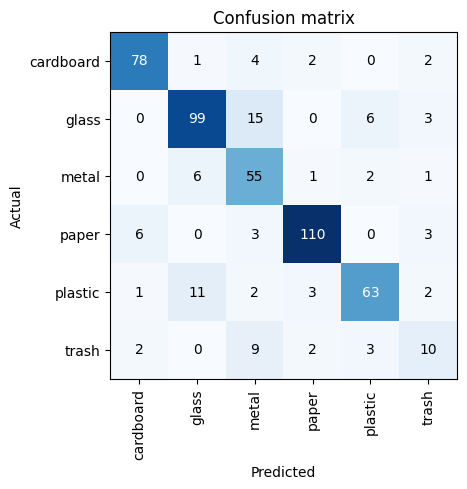

In [17]:
# Confusion Matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

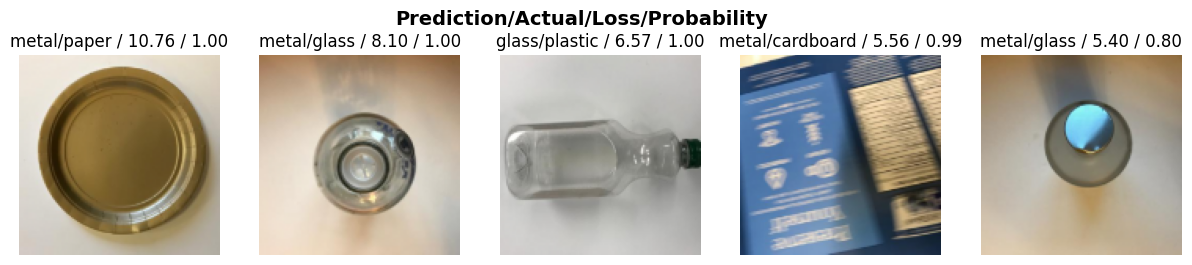

In [18]:
# Top losses from the validation set
interp.plot_top_losses(5,nrows=1)

<p style="font-size:24px; font-family:verdana;">Cleaning Data</p>

In [20]:
cleaner = ImageClassifierCleaner(learn)
cleaner

<p style="font-size:24px; font-family:verdana;">Final Training</p>

In [21]:
learn = vision_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.828496,0.728622,0.241584,01:15


epoch,train_loss,valid_loss,error_rate,time
0,0.943042,0.531660,0.174257,01:52
1,0.725585,0.475376,0.142574,01:51
2,0.563727,0.386455,0.122772,01:40
3,0.403482,0.373895,0.108911,01:17
4,0.294284,0.313208,0.091089,01:16
5,0.228275,0.304270,0.099010,01:16


<p style="font-size:24px; font-family:verdana;">Exporting the model</p>

In [28]:
learn.export(fname='C:/Users/adipi/Documents/Code/Internship-RAKRIC-0723/trash-classification/export.pkl', pickle_protocol=2)

<p style="font-size:24px; font-family:verdana;">Resources</p>
<p style="font-size:15px; font-family:verdana;">One the best resources to learn about Fastai is <a href="https://course.fast.ai/">Practical Deep Learning for Coders</a> Course currated by <a href="https://www.kaggle.com/jhoward">Jeremy Howard</a>. Also check out this <a href="https://www.kaggle.com/code/jhoward/is-it-a-bird-creating-a-model-from-your-own-data">notebook</a> by Jeremy to get yourself familiar with how to create Image Classification Model.</p>

<h1 style="font-family:verdana;" id="modelpy"> 
        model.py
</h1>

<p style="font-size:15px; font-family:verdana;">Run this file to perform whole training process</p>

In [23]:
%%writefile model.py

from fastai.vision.all import *
from fastai.vision.widgets import *
path = "C:/Users/adipi/Documents/Code/Internship-RAKRIC-0723/Dataset"
files = get_image_files(path)
dls = ImageDataLoaders.from_folder(path,valid_pct=0.2,
                                   item_tfms = Resize(224),
                                   batch_tfms = aug_transforms(size=128,min_scale=0.75))
learn = vision_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(6)

Writing model.py


<h1 style="font-family:verdana;" id="fastapi"> 
      Creating FASTAPI file
</h1>

<p style="font-size:15px; font-family:verdana;">We will be using <a href="https://fastapi.tiangolo.com/lo/">FastApi</a> i.e is a modern, fast (high-performance), web framework for building APIs with Python 3.7+ based on standard Python</p>

<h1 style="font-family:verdana;" id="req"> 
      requirements.txt
</h1>

<p style="font-size:15px; font-family:verdana;"> Create a requirements.txt file on the start-here branch, and put in the following. Note that you can use any other version of the listed packages below, as long as they still work together.</p>

In [24]:
%%writefile requirements.txt
fastai == 2.7.12
fastapi == 0.96.1 
uvicorn== 0.22.0 
scikit-image  == 0.21.0
numpy==1.24.3
urllib3 == 1.26.15

Writing requirements.txt


<h1 style="font-family:verdana;" id="mainpy"> 
      main.py
</h1>

<p style="font-size:15px; font-family:verdana;">Let's start writing the code for FastAPI. In the root directory, create a main.py file. In that file, add the following lines of code</p>
<p style="font-size:15px; font-family:verdana;">We also added the <span style="background-color: lightgrey;">CORSMiddleware</span> which essentially allows us to access the API in a different host. That is, we can extend the app further by creating a front-end interface for it. We won't cover that in this article but I put it here just in case you want to create a front-end to interact with the API as well./p>

In [25]:
%%writefile main.py
from fastapi import FastAPI
from fastapi.middleware.cors import CORSMiddleware
from uvicorn import run
from fastai.vision.all import *
import skimage
from urllib.request import urlopen
import os

app = FastAPI()

origins = ["*"]
methods = ["*"]
headers = ["*"]

app.add_middleware(
    CORSMiddleware,
    allow_origins=origins,
    allow_credentials=True,
    allow_methods=methods,
    allow_headers=headers,
)

learn = load_learner("export.pkl")


@app.get("/")
async def root():
    return {"message": "Welcome to the Garbage Classification API!"}


@app.post("/predict")
async def get_net_image_prediction(image_link: str = ""):
    if image_link == "":
        return {"message": "No image link provided"}
    pred, idx, prob = learn.predict(PILImage.create(urlopen(image_link)))
    return {"prediction": pred, "probability": float(prob[0])}
if __name__ == "__main__":
    port = int(os.environ.get("PORT", 5000))
    run(app, host="0.0.0.0", port=port)


Writing main.py


<p style="font-size:24px; font-family:verdana;">Running</p>
<p style="font-size:15px; font-family:verdana;">Running the command <span style="background-color: lightgrey;">python -m uvicorn main:app --reload</span>
    will run the app on your device's local server at port 5000</p>
<img src="https://imgur.com/vt7g9t1.png" style="width: 50%; height: auto;" />

<p style="font-size:15px; font-family:verdana;"> <span style="background-color: lightgrey;">@app</span> is needed for FastAPI commands. The <span style="background-color: lightgrey;">get</span> is an HTTP method, while the <span style="background-color: lightgrey;">"/"</span> is the URL path of that specific API request. Below that we call a function that will return something. Here we just return a simple <span style="background-color: lightgrey;">json</span> message.</p>

<p style="font-size:24px; font-family:verdana;">Checking out the FastAPI Swagger UI</p>
<p style="font-size:15px; font-family:verdana;">Go to <a href="http://127.0.0.1:5000/docs">http://127.0.0.1:5000/docs</a> or simply add <span style="background-color: lightgrey;">"/docs"</span> to the localhost url.</p>
<p style="font-size:15px; font-family:verdana;">Finally let's check out how our model is working🚀</p>

<img src="https://imgur.com/j41EIFL.gif" style="width: 70%; height: auto;display: block; margin: 0 auto;" />

 <h1 style="font-family:verdana;" id="railway"> 
      Deploying it to Railway
</h1>


<p style="font-size:15px; font-family:verdana;"><a href="https://railway.app/">Railway</a> is the cloud that takes the complexity out of shipping software.</p>

In [29]:
%%writefile railway.json
{
  "$schema": "https://railway.app/railway.schema.json",
  "build": {
    "builder": "NIXPACKS"
  },
  "deploy": {
    "startCommand": "uvicorn main:app --host 0.0.0.0 --port $PORT",
    "restartPolicyType": "ON_FAILURE",
    "restartPolicyMaxRetries": 10
  }
}

Writing railway.json


<p style="font-size:15px; font-family:verdana;">We need this file to make sure that our API run on any port available on Railway not specificly on Port:5000 defined in main.py file</p>

<p style="font-size:24px; font-family:verdana;">Create a Github Repo</p>
<p style="font-size:15px; font-family:verdana;">Upload the following files</p>
<ul>
<li>export.pkl</li>
<li>main.py</li>
<li>railway.json</li>
<li>requirements.txt</li>
</ul>
<p style="font-size:15px; font-family:verdana;">Resouce on <a href="https://docs.github.com/en/get-started/quickstart/create-a-repo">How to make a Github Repo</a></p>

<p style="font-size:15px; font-family:verdana;">You can get files from Output</p>

<img src="https://i.imgur.com/q4Bqe5T.png" style="width:70%;height:auto;display: block; margin: 0 auto;"/></div>

<p style="font-size:24px; font-family:verdana;">Deployment Process on Railway just takes few click</p>

<p style="font-size:15px; font-family:verdana;">First go to <a href="https://railway.app/">railway.app</a> and create an account</p>
<ul>
    <li>Start New Project </li>
    <li>Deploy from GitHub Repo</li>
    <li>Select the Repo</li>
<ul>

<img src="https://imgur.com/CrPfHFK.gif" style="width: 70%; height: auto;display: block; margin: 0 auto;" />

 <h1 style="font-family:verdana;" id="postman"> 
      Checking the API on Postman
</h1>

<p style="font-size:15px; font-family:verdana;">You will recieve a URL to call requests from Railway</p>

<img src="https://imgur.com/RIO8qqS.png" style="width: 50%; height: auto;"/>

<p style="font-size:24px; font-family:verdana;">Calling Request from Postman</p>

<img src="https://imgur.com/vg5yfhB.gif" style="width:70%;height:auto;display: block; margin: 0 auto;" /></div>

<h1 style="font-family:verdana;" id="conclusion"> 
    Conclusion
</h1>

<p style="font-size:15px; font-family:verdana;">Here, I tried my best to showcase how to easily deploy your models to use it on your apps. Would be coming out with more such notebooks 🗒️</p>

<p style="font-size:24px; font-family:verdana;text-align:center;">If you found this notebook helpful please Upvote 🏅</p>
 <img src="https://media.tenor.com/ES2snnzhJDQAAAAC/dwight-schrute-mallard.gif" style="display: block; margin: 0 auto;"/>